Importing all required Libraries and packages for the model building and data

In [0]:
!pip install scikit-learn
!pip install 'nltk==3.4.5'

In [0]:
import re
from sklearn.model_selection import train_test_split

In [0]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Flatten
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from tensorflow.keras import layers
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

Now, we will get our dataset from Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "drive/My Drive/Colab Dataset/IMDB-Dataset.csv"
IMDBFull = pd.read_csv(path)

Clearing the data of unwanted spaces and other symbols

In [0]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [0]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [0]:
X = []
sentences = list(IMDBFull['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

Defining the sentiments as 1 for Positive and 0 for negative

In [0]:
y = IMDBFull['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

Train Test split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [0]:
X_train,X_val,y_train,Y_val=train_test_split(X_train,y_train,test_size=0.375)

In [0]:
tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val=tokenizer.texts_to_sequences(X_val)

Padding to define a set limit of the input sequences.

In [0]:
max_words = 300
num_words = 3000
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
X_val = sequence.pad_sequences(X_val, maxlen=max_words)

Using convolution layer, adding a flatten layer to reduce the dimension.

In [0]:
embedding_length = 64
model = Sequential()
model.add(Embedding(num_words, embedding_length, input_length=max_words))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(1, activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 64)           192000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 296, 64)           20544     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 148, 64)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 148, 64)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9472)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9473      
Total params: 222,017
Trainable params: 222,017
Non-trainable params: 0
________________________________________________

In [0]:
history = model.fit(X_train, y_train, validation_data=(X_val, Y_val), epochs=3, batch_size=64)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 15000 samples
Epoch 1/3
25000/25000 [==============================] - 32s 1ms/step - loss: 0.6230 - accuracy: 0.6904 - val_loss: 0.4299 - val_accuracy: 0.8141
Epoch 2/3
25000/25000 [==============================] - 32s 1ms/step - loss: 0.4309 - accuracy: 0.8070 - val_loss: 0.4136 - val_accuracy: 0.8203
Epoch 3/3
25000/25000 [==============================] - 32s 1ms/step - loss: 0.3491 - accuracy: 0.8141 - val_loss: 0.4424 - val_accuracy: 0.8238


In [0]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", scores[0])
print("Test Accuracy:", scores[1])

10000/10000 [==============================] - 3s 257us/step
Test Loss: 0.46834766569137576
Test Accuracy: 0.817300021648407


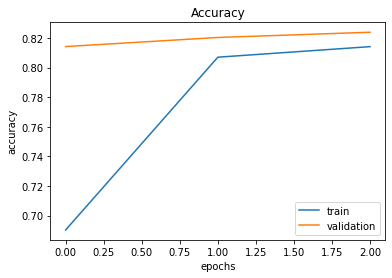

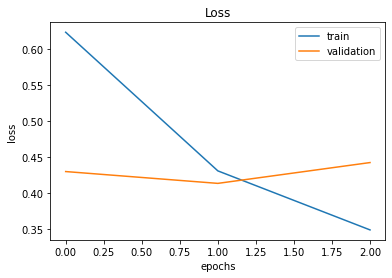

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','validation'], loc='upper right')
plt.show()